# Logistic回歸

&emsp;&emsp;Logistic回歸是一個二分類模型。它把線性運算的結果映射到$(0, 1)$範圍內，實現分類。

## 線性+非線性 | Model

&emsp;&emsp;考慮二分類的過程。我們希望模型接受一個輸入${\boldsymbol x}^{(i)}$，經過運算後輸出該輸入的類別${\hat y}^{(i)}$。假設正類的類標記為1，負類的類標記為0，則二分類模型可以寫成：
$$
{\boldsymbol x}^{(i)} \xrightarrow{運算} {\hat y}^{(i)} \in \{0, 1\}
$$  
</br>
<center><font color=gray>模型1</font></center>

&emsp;&emsp;Logistic回歸二分類模型在模型接受輸入${\boldsymbol x}^{(i)}$後先對其執行線性回歸運算$z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b$，再進行分類：

$$
{\boldsymbol x}^{(i)} \xrightarrow{z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b} z^{(i)} \xrightarrow{分類} {\hat y}^{(i)} \in \{0, 1\}
$$  
</br>
<center><font color=gray>模型2</font></center>

&emsp;&emsp;在上面的模型中，回歸運算的結果$z^{(i)} \in R$，但是分類結果${\hat y}^{(i)} \in \{0, 1\}$。因此模型中“分類”的操作需要把$z^{(i)}$的值轉換成兩個可能的值：0和1。這可以用一個函數$g(\cdot)$實現。我們希望這個函數$g(\cdot)$的輸入是回歸模型的輸出$z^{(i)}$，輸出${\hat y}^{(i)}$是類標記：0或者1。因此，上面的模型可以寫成如下形式:

$$
{\boldsymbol x}^{(i)} \xrightarrow{z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b} z^{(i)} \xrightarrow{{\hat y}^{(i)} = g(z^{(i)})} {\hat y}^{(i)} \in \{0, 1\}
$$  
</br>
<center><font color=gray>模型3</font></center>

### 單位階躍函數

&emsp;&emsp;對於函數$g(\cdot)$，我們希望其輸入$z^{(i)} \in R$，而輸出${\hat y}^{(i)} \in \{0, 1\}$。單位階躍函數$\epsilon(\cdot)$是理想的選擇。其表達式為：
$$
\epsilon(z^{(i)}) = \left\{
\begin{align}
& 0 & \mbox{$z^{(i)} < 0$} \\
& 0.5 & \mbox{$z^{(i)} = 0$} \\
& 1 & \mbox{$z^{(i)} > 0$}
\end{align}
\tag{1}
\right.
$$

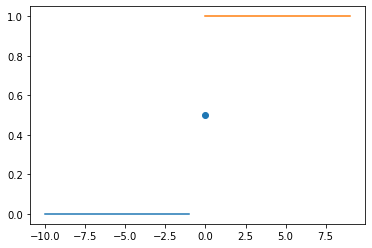

In [7]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(-10, 0)], [0 for i in range(-10, 0)])
plt.scatter([0], [0.5])
plt.plot([i for i in range(0, 10)], [1 for i in range(0, 10)])
plt.show()

&emsp;&emsp;對於一個輸入${\boldsymbol x}^{(i)}$，當線性運算$z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b$的結果$z^{(i)}$為負數，${\hat y}^{(i)} = \epsilon(z^{(i)})$的結果為0，因此輸入${\boldsymbol x}^{(i)}$為負類；當線性運算的結果為正數，$\epsilon(z^{(i)})$的結果為1，因此輸入${\boldsymbol x}^{(i)}$為正類；當線性運算的結果為0，$\epsilon(z^{(i)})$的結果為0.5，輸入${\boldsymbol x}^{(i)}$為正類、負類中的任一個。

$$
{\boldsymbol x}^{(i)} \xrightarrow{z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b} z^{(i)} \xrightarrow{{\hat y}^{(i)} = \epsilon(z^{(i)})} {\hat y}^{(i)} \in \{0, 1\}
$$  
</br>
<center><font color=gray>模型4</font></center>

「例1」假設線性運算為 $z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b$中，${\boldsymbol w}^T = [0, 1]$，$b = 1$，有兩個輸入：${\boldsymbol x}^{(1)} = [0, 1]^T$，${\boldsymbol x}^{(2)} = [1, -2]^T$。用模型4求兩個輸入的類別。$g(\cdot)$為單位階躍函數$\epsilon(\cdot)$。  
解：  
&emsp;&emsp;根據題意，
$$
z^{(i)} = [0, 1] \cdot {\boldsymbol x}^{(i)} + 1 \tag{2.1}
$$
&emsp;&emsp;線性運算：
$$
\begin{align}
z^{(1)} 
&= [0, 1] \cdot {\boldsymbol x}^{(1)} + 1 \tag{2.2} \\
&= [0, 1] \cdot [0, 1]^T + 1 \tag{2.3} \\
&= 2 \tag{2.4} \\
\\
z^{(2)} 
&= [0, 1] \cdot {\boldsymbol x}^{(2)} + 1 \tag{2.5} \\
&= [0, 1] \cdot [1, -2]^T + 1 \tag{2.6} \\
&= -1 \tag{2.7}
\end{align}
$$  
</br>
&emsp;&emsp;根據階躍函數
$$
\begin{align}
{\hat y}^{(1)} = \epsilon(z^{(1)}) &= \epsilon(2) = 1 \tag{2.8} \\
{\hat y}^{(2)} = \epsilon(z^{(2)}) &= \epsilon(-1) = 0 \tag{2.9}
\end{align}
$$  
</br>
&emsp;&emsp;因此輸入${\boldsymbol x}^{(1)}是正類；{\boldsymbol x}^{(2)}$是負類。

### 對數幾率函數

&emsp;&emsp;上面的階躍函數能很好地將線性輸出$z^{(i)}$轉換成0和1兩個值，分別對應二分類的兩個類別。但是單位階躍函數不連續，不利於模型的優化，因此難以實際應用。因此需要找一個連續的函數代替單位階躍函數。人們常常用對數幾率函數$\sigma (\cdot)$代替單位階躍函數。對數幾率函數是連續的，其表達式為：
$$
\sigma(z) = \frac{1}{1 + e^{-z}} \tag{3}
$$

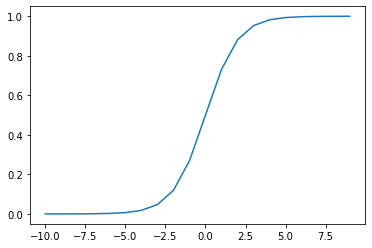

In [9]:
import math
plt.plot([i for i in range(-10, 10)], [(1 / (1 + math.exp(-i))) for i in range(-10, 10)])
plt.show()

&emsp;&emsp;對數幾率函數是連續的，因此其輸出$\sigma(z^{(i)})$就不只有0和1兩個值了。由函數圖像看出，對數幾率函數的輸出$\sigma(z^{(i)}) \in (0, 1)$。巧的是，概率的取值是$[0, 1]$，和對數幾率函數的值域很類似。因此，我們可以將對數幾率函數的輸出當作輸入${\boldsymbol x}^{(i)}$屬於二分類中兩個類別的其中一個類別的概率。常常將對數幾率函數的輸出${\hat y}^{(i)}$當作輸入${\boldsymbol x}^{(i)}$屬於正類的概率$p(y^{(i)} = 1 | {\boldsymbol x}^{(i)})$。  
$$
p(y^{(i)} = 1 | {\boldsymbol x}^{(i)}) = {\hat y}^{(i)} \tag{4}
$$
&emsp;&emsp;而對於二分類，  
$$
p(y^{(i)} = 0 | {\boldsymbol x}^{(i)}) = 1 - p(y^{(i)} = 1 | {\boldsymbol x}^{(i)}) \tag{5}
$$
&emsp;&emsp;因此
$$
p(y^{(i)} = 0 | {\boldsymbol x}^{(i)}) = 1 - y^{(i)} \tag{6}
$$  
&emsp;&emsp;對於輸入${\boldsymbol x}^{(i)}$，對數幾率函數的輸出越靠近1，$p(y^{(i)} = 1 | {\boldsymbol x}^{(i)})$越大，$p(y^{(i)} = 0 | {\boldsymbol x}^{(i)}) = 1 - p(y^{(i)} = 1 | {\boldsymbol x}^{(i)})$越小，因此輸入屬於正類的概率越大，屬於負類的概率越小；對數幾率函數的輸出越靠近0，$p(y^{(i)} = 1 | {\boldsymbol x}^{(i)})$越小，$p(y^{(i)} = 0 | {\boldsymbol x}^{(i)}) = 1 - p(y^{(i)} = 1 | {\boldsymbol x}^{(i)})$越大，因此輸入屬於正類的概率越小，屬於負類的概率越大。通常，當$p(y^{(i)} = 1 | {\boldsymbol x}^{(i)}) >= 0.5$，便可認為輸入是正類，否則為負類。

&emsp;&emsp;現在我們的模型變成：  
</br>  
$$
{\boldsymbol x}^{(i)} \xrightarrow{z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b} z^{(i)} \xrightarrow{{\hat y}^{(i)} = \sigma(z^{(i)})} {\hat y}^{(i)} \in (0, 1) \\
$$  
</br>
<center><font color=gray>模型5</font></center>

&emsp;&emsp;這就是logistic回歸的模型。  
&emsp;&emsp;需要注意的是，logistic回歸的輸出${\hat y}^{(i)}$（即模型5的輸出）的值域是$(0, 1)$，不是$\{0, 1\}$。也就是說，輸出的是概率，不是預測的類別標記0或者1。當我們需要預測的時候，才將概率轉換成類別：
$$
類別 = \left\{
\begin{align}
& 1 & {\hat y}^{(i)} \ge 0.5 \\
& 0 & {\hat y}^{(i)} < 0.5
\end{align}
\tag{7}
\right.
$$
&emsp;&emsp;這是在把logistic回歸的輸出$y^{(i)}$當作${\boldsymbol x}^{(i)}$是正類的概率，即$p(y^{(i)} = 1 | {\boldsymbol x}^{(i)}) = {\hat y}^{(i)}$下的情況。如果把logistic回歸的輸出$y^{(i)}$當作${\boldsymbol x}^{(i)}$是負類的概率，即$p(y^{(i)} = 0 | {\boldsymbol x}^{(i)}) = {\hat y}^{(i)}$，就要把公式(7)的0和1互換位置。
$$
類別 = \left\{
\begin{align}
& 0 & {\hat y}^{(i)} \ge 0.5 \\
& 1 & {\hat y}^{(i)} < 0.5
\end{align}
\tag{8}
\right.
$$

「例2」假設線性運算為 $z^{(i)} = {\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b$中，${\boldsymbol w}^T = [0, 1]$，$b = 1$，有兩個輸入：${\boldsymbol x}^{(1)} = [0, 1]^T$，${\boldsymbol x}^{(2)} = [1, -2]^T$。用模型5求兩個輸入的類別。$g(\cdot)$為對數幾率函數。把logistic回歸的輸出當作輸入是正類的概率。  
解：  
&emsp;&emsp;根據題意，
$$
z^{(i)} = [0, 1] \cdot {\boldsymbol x}^{(i)} + 1 \tag{9.1}
$$
&emsp;&emsp;線性運算：
$$
\begin{align}
z^{(1)} 
&= [0, 1] \cdot {\boldsymbol x}^{(1)} + 1 \tag{9.2} \\
&= [0, 1] \cdot [0, 1]^T + 1 \tag{9.3} \\
&= 2 \tag{9.4} \\
\\
z^{(2)} 
&= [0, 1] \cdot {\boldsymbol x}^{(2)} + 1 \tag{9.5} \\
&= [0, 1] \cdot [1, -2]^T + 1 \tag{9.6} \\
&= -1 \tag{9.7}
\end{align}
$$  
</br>
&emsp;&emsp;非線性映射：
$$
\begin{align}
&{\hat y}^{(1)} = \sigma(z^{(1)}) = \sigma(2) = 0.88 \tag{9.8} \\
\\
&{\hat y}^{(2)} = \sigma(z^{(2)}) = \sigma(-1) = 0.26 \tag{9.9} \\
\end{align}
$$  
</br>
&emsp;&emsp;預測：
$$
\begin{align}
&\because\ p({\hat y}^{(1)} = 1 | {\boldsymbol x}^{(1)}) = {\hat y}^{(1)} \ge 0.5 \tag{9.10} \\
&\therefore {\boldsymbol x}^{(1)} 是正類 \tag{9.11} \\
&\because\ p({\hat y}^{(2)} = 1 | {\boldsymbol x}^{(2)}) = {\hat y}^{(2)} < 0.5 \tag{9.12} \\
&\therefore {\boldsymbol x}^{(2)} 是負類 \tag{9.13}
\end{align}
$$

## 評判標準 | Loss Function & Cost Function

&emsp;&emsp;Logistic回歸採用的損失函數是交叉熵損失。
$$
L^{(i)} = -\sum y^{(i)} ln {\hat y}^{(i)} \tag{10}
$$

&emsp;&emsp;Logistic回歸是個二分類問題，故公式(8)可展開為
$$
\begin{align}
L^{(i)} &= - (y^{(i)} ln {\hat y}^{(i)} + (1 - y^{(i)})\ ln ({1 - \hat y}^{(i)})) \tag{11.1} \\
&= - y^{(i)} ln {\hat y}^{(i)} - (1 - y^{(i)})\ ln ({1 - \hat y}^{(i)}) \tag{11.2}
\end{align}
$$

&emsp;&emsp;因此代價函數J為
$$
\begin{align}
J &= \sum^m_{i=1} L^{(i)} \tag{12.1} \\
&= \sum^m_{i=1} (- y^{(i)} ln {\hat y}^{(i)} - (1 - y^{(i)})\ ln ({1 - \hat y}^{(i)})) \tag{12.2} \\
&= - \sum^m_{i=1} (y^{(i)} ln {\hat y}^{(i)} + (1 - y^{(i)})\ ln ({1 - \hat y}^{(i)}))
\end{align}
$$

「例3」假設某樣本${\boldsymbol x}^{(2)}$標記$y^{(2)}$為+1，預測值${\hat y}^{(2)}$為0.233，求其損失函數。  
解：  
$$
\begin{align}
L^{(2)} &= - y^{(2)} ln {\hat y}^{(2)} - (1 - y^{(2)}) ln ({1 - \hat y}^{(2)}) \tag{13.1} \\
&= - 1 \cdot ln\ 0.233 - (1 - 1) \cdot ln (1 - 0.233) \tag{13.2} \\
&= - 1.456 \tag{13.3}
\end{align}
$$

## 優化 | Optimization

&emsp;&emsp;Logistic回歸的損失函數/代價函數是凸函數，可用梯度下降求最優值。如果用隨機梯度下降，
$$
\begin{align}
\boldsymbol w &:= \boldsymbol w + \eta \nabla_{\boldsymbol w} L^{(i)} \tag{14.1} \\
b &:= b + \eta \nabla_b L^{(i)} \tag{14.2}
\end{align}
$$

「例4」求$\frac{\partial \sigma(z)}{\partial z}$、$\nabla_{\boldsymbol w} L^{(i)}$和$\nabla_b L^{(i)}$。  
解：  
$$
\begin{align}
\frac{\partial \sigma(z)}{\partial z}
&= \frac{\partial}{\partial z} \frac{1}{1 + e^{-z}} \\
&= - \frac{1}{(1 + e^{-z})^2} \cdot e^{-z} \cdot -1 \\
&= \frac{e^{-z}}{(1 + e^{-z})^2} \\
&= \frac{e^{-z} + 1 - 1}{(1 + e^{-z})^2} \\
&= \frac{1 + e^{-z}}{(1 + e^{-z})^2} - \frac{1}{(1 + e^{-z})^2} \\
&= \frac{1}{1 + e^{-z}} - \frac{1}{(1 + e^{-z})^2} \qquad \mbox{($1 + e^x > 1$，因此可約掉)} \\
&= \sigma(z)(1 - \sigma(z)) \\
\\
\nabla_{\boldsymbol w} L^{(i)}
&= \frac{\partial}{\partial \boldsymbol w} [-y^{(i)} ln {\hat y}^{(i)} - (1 - y^{(i)}) ln (1 - {\hat y}^{(i)})] \\
&= -y^{(i)} \frac{\partial}{\partial \boldsymbol w} ln {\hat y}^{(i)} - (1 - y^{(i)}) \frac{\partial}{\partial \boldsymbol w} ln (1 - {\hat y}^{(i)}) \\
&= -y^{(i)} \frac{\partial ln {\hat y}^{(i)}}{\partial {\hat y}^{(i)}} \frac{\partial {\hat y}^{(i)}}{\partial z^{(i)}} \frac{\partial z^{(i)}}{\partial \boldsymbol w} - (1 - y^{(i)}) \frac{\partial ln (1 - {\hat y}^{(i)})}{\partial {\hat y}^{(i)}} \frac{\partial {\hat y}^{(i)}}{\partial z^{(i)}} \frac{\partial z^{(i)}}{\partial \boldsymbol w} \\
&= -y^{(i)} \frac{\partial ln {\hat y}^{(i)}}{\partial {\hat y}^{(i)}} \frac{\partial \sigma(z^{(i)})}{\partial z^{(i)}} \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial \boldsymbol w} - (1 - y^{(i)}) \frac{\partial ln (1 - {\hat y}^{(i)})}{\partial {\hat y}^{(i)}} \frac{\partial \sigma(z^{(i)})}{\partial z^{(i)}} \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial \boldsymbol w} \\
&= -y^{(i)} \frac{1}{{\hat y}^{(i)}} {\hat y}^{(i)}(1 - {\hat y}^{(i)}) \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial \boldsymbol w} - (1 - y^{(i)}) \frac{1}{{\hat y}^{(i)} - 1} {\hat y}^{(i)}(1 - {\hat y}^{(i)}) \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial \boldsymbol w} \\
&= -y^{(i)} (1 - {\hat y}^{(i)}) {\boldsymbol x}^{(i)} + (1 - y^{(i)}){\hat y}^{(i)} {\boldsymbol x}^{(i)} \qquad \mbox{(${\hat y}^{(i)} = \sigma(z^{(i)}) \in (0, 1)$, $1 - {\hat y}^{(i)} = 1 - \sigma(z^{(i)}) \in (0, 1)$，所以可以約掉)} \\
&= -y^{(i)} {\boldsymbol x}^{(i)} + y^{(i)} {\hat y}^{(i)} {\boldsymbol x}^{(i)} + {\hat y}^{(i)} {\boldsymbol x}^{(i)} - y^{(i)} {\hat y}^{(i)} {\boldsymbol x}^{(i)} \\
&= ({\hat y}^{(i)} - y^{(i)}) {\boldsymbol x}^{(i)} \\
\\
\nabla_b L^{(i)}
&= \frac{\partial}{\partial b} [-y^{(i)} ln {\hat y}^{(i)} - (1 - y^{(i)}) ln (1 - {\hat y}^{(i)})] \\
&= -y^{(i)} \frac{\partial}{\partial b} ln {\hat y}^{(i)} - (1 - y^{(i)}) \frac{\partial}{\partial b} ln (1 - {\hat y}^{(i)}) \\
&= -y^{(i)} \frac{\partial ln {\hat y}^{(i)}}{\partial {\hat y}^{(i)}} \frac{\partial {\hat y}^{(i)}}{\partial z^{(i)}} \frac{\partial z^{(i)}}{\partial b} - (1 - y^{(i)}) \frac{\partial ln (1 - {\hat y}^{(i)})}{\partial {\hat y}^{(i)}} \frac{\partial {\hat y}^{(i)}}{\partial z^{(i)}} \frac{\partial z^{(i)}}{\partial b} \\
&= -y^{(i)} \frac{\partial ln {\hat y}^{(i)}}{\partial {\hat y}^{(i)}} \frac{\partial \sigma(z^{(i)})}{\partial z^{(i)}} \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial b} - (1 - y^{(i)}) \frac{\partial ln (1 - {\hat y}^{(i)})}{\partial {\hat y}^{(i)}} \frac{\partial \sigma(z^{(i)})}{\partial z^{(i)}} \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial b} \\
&= -y^{(i)} \frac{1}{{\hat y}^{(i)}} {\hat y}^{(i)}(1 - {\hat y}^{(i)}) \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial b} - (1 - y^{(i)}) \frac{1}{{\hat y}^{(i)} - 1} {\hat y}^{(i)}(1 - {\hat y}^{(i)}) \frac{\partial ({\boldsymbol w}^T \cdot {\boldsymbol x}^{(i)} + b)}{\partial b} \\
&= -y^{(i)} (1 - {\hat y}^{(i)}) + (1 - y^{(i)}){\hat y}^{(i)} \qquad \mbox{(${\hat y}^{(i)} = \sigma(z^{(i)}) \in (0, 1)$, $1 - {\hat y}^{(i)} = 1 - \sigma(z^{(i)}) \in (0, 1)$，所以可以約掉)} \\
&= -y^{(i)} + y^{(i)} {\hat y}^{(i)} + {\hat y}^{(i)} - y^{(i)} {\hat y}^{(i)} \\
&= {\hat y}^{(i)} - y^{(i)}
\end{align}
$$

&emsp;&emsp;得到$\nabla_{\boldsymbol w} L^{(i)}$和$\nabla_b L^{(i)}$之後,就可以用隨機梯度下降優化模型。